In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 음식별 온실가스 배출량

In [ ]:
food = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Food_Product_Emissions.csv')
food.head()

,Food product,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total from Land to Retail,Total Global Average GHG Emissions per kg,Unit of GHG Emissions
0,Apples,-0.029,0.000,0.225,0.004,0.096,0.044,0.017,0.357,0.43,kg CO2e per kg food produced
1,Bananas,-0.025,0.000,0.266,0.059,0.292,0.065,0.021,0.678,0.86,kg CO2e per kg food produced
2,Barley,0.009,0.000,0.176,0.128,0.035,0.497,0.264,1.109,1.18,kg CO2e per kg food produced
3,Beef (beef herd),16.278,1.878,39.388,1.269,0.346,0.247,0.164,59.570,99.48,kg CO2e per kg food produced
4,Beef (dairy herd),0.906,2.508,15.689,1.108,0.424,0.268,0.182,21.085,33.30,kg CO2e per kg food produced


In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Food product                               43 non-null     object 
 1   Land Use Change                            43 non-null     float64
 2   Feed                                       43 non-null     float64
 3   Farm                                       43 non-null     float64
 4   Processing                                 43 non-null     float64
 5   Transport                                  43 non-null     float64
 6   Packaging                                  43 non-null     float64
 7   Retail                                     43 non-null     float64
 8   Total from Land to Retail                  43 non-null     float64
 9   Total Global Average GHG Emissions per kg  43 non-null     float64
 10  Unit of GHG Emissions       

In [ ]:
# 컬럼: "토지 사용 변화" "사료" "농업" "가공" "운송" "포장" "유통" "전체" "kg 당 평균"

In [ ]:
# 결측값 확인
food.isna().sum().sum()

0

In [ ]:
# 컬럼면 변경, 선택
food.rename(columns={'Food product':'Food', 'Total Global Average GHG Emissions per kg':'GHG Emissions'}, inplace=True)
food = food[['Food', 'GHG Emissions']]

In [ ]:
# 음식 종류 확인
food['Food'].unique()

array(['Apples', 'Bananas', 'Barley', 'Beef (beef herd)',
       'Beef (dairy herd)', 'Beet Sugar', 'Berries & Grapes', 'Brassicas',
       'Cane Sugar', 'Cassava', 'Cheese', 'Citrus Fruit', 'Coffee',
       'Dark Chocolate', 'Eggs', 'Fish (farmed)', 'Groundnuts',
       'Lamb & Mutton', 'Maize', 'Milk', 'Nuts', 'Oatmeal', 'Olive Oil',
       'Onions & Leeks', 'Other Fruit', 'Other Pulses',
       'Other Vegetables', 'Palm Oil', 'Peas', 'Pig Meat', 'Potatoes',
       'Poultry Meat', 'Rapeseed Oil', 'Rice', 'Root Vegetables',
       'Shrimps (farmed)', 'Soybean Oil', 'Soymilk', 'Sunflower Oil',
       'Tofu', 'Tomatoes', 'Wheat & Rye', 'Wine'], dtype=object)

### 그룹화

In [ ]:
# 음식 그룹화

def food_group(x):
  if x in ['Apples', 'Bananas', 'Berries & Grapes', 'Citrus Fruit', 'Other Fruit']:
    return 'Fruits'
  elif x in ['Brassicas', 'Cassava', 'Maize', 'Onions & Leeks', 'Potatoes', 'Tomatoes', 'Root Vegetables', 'Other Vegetables']:
    return 'Vegetables'
  elif x in ['Barley', 'Oatmeal', 'Wheat & Rye', 'Rice']:
    return 'Grains'
  elif x in ['Peas', 'Other Pulses', 'Tofu']:
    return 'Regumes'
  elif x in ['Groundnuts', 'Nuts']:
    return 'Nuts'
  elif x in ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat']:
    return 'Meat'
  elif x in ['Fish (farmed)', 'Shrimps (farmed)']:
    return 'Seafood'
  elif x in ['Milk', 'Soymilk', 'Cheese']:
    return 'Dairy'
  elif x in ['Olive Oil', 'Palm Oil', 'Rapeseed Oil', 'Sunflower Oil', 'Soybean Oil']:
    return 'Oil'
  elif x in ['Beet Sugar', 'Cane Sugar']:
    return 'Sugar'
  else:
    return x

food['Food Group'] = food['Food'].apply(food_group)
food['Food Group'].unique()

array(['Fruits', 'Grains', 'Meat', 'Sugar', 'Vegetables', 'Dairy',
       'Coffee', 'Dark Chocolate', 'Eggs', 'Seafood', 'Nuts', 'Oil',
       'Regumes', 'Wine'], dtype=object)

In [ ]:
# 음식 그룹별 온실가스 배출량
food_group = food.groupby('Food Group')['GHG Emissions'].mean().sort_values(ascending=False)
food_group

Food Group
Dark Chocolate    46.650000
Meat              38.936000
Coffee            28.530000
Seafood           20.250000
Dairy              9.336667
Oil                5.286000
Eggs               4.670000
Sugar              2.505000
Grains             2.420000
Regumes            1.976667
Nuts               1.830000
Wine               1.790000
Vegetables         0.942500
Fruits             0.852000
Name: GHG Emissions, dtype: float64

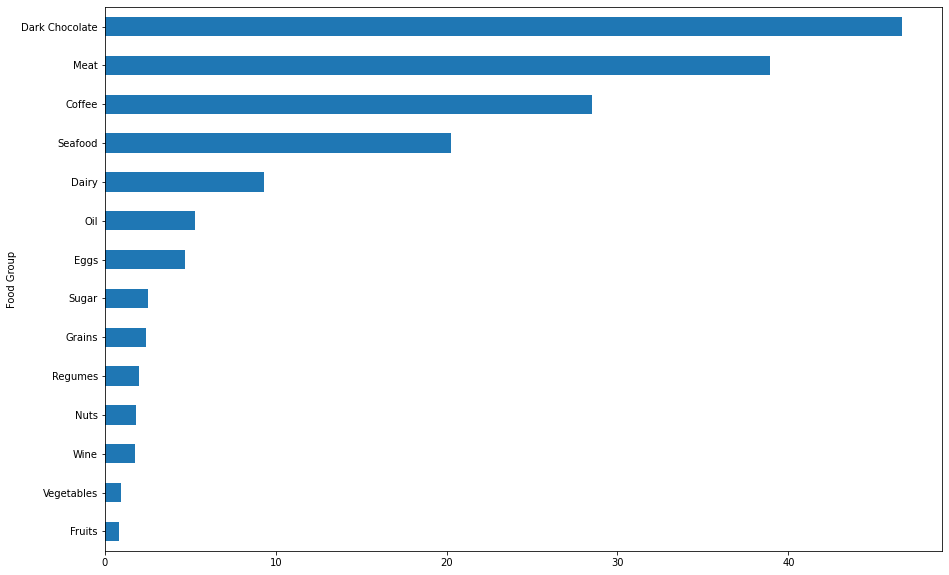

In [ ]:
# 음식 그룹별 온실가스 배출량 시각화
fig, ax = plt.subplots(figsize=(15, 10))
food_group.sort_values(ascending=True).plot(x='Food Group', y='GHG Emissions', kind='barh', ax=ax)
plt.show()

### 고기 제외 그룹화



*   고기가 제일 높게 나와야 되는데 다크 초콜렛이 나옴
*   고기 그룹 살펴보고 문제점 파악, 재그룹화



In [ ]:
# 고기 종류별 온실가스 배출량
food[food['Food Group']=='Meat']

,Food,Food Group,GHG Emissions
3,Beef (beef herd),Meat,99.48
4,Beef (dairy herd),Meat,33.30
17,Lamb & Mutton,Meat,39.72
29,Pig Meat,Meat,12.31
31,Poultry Meat,Meat,9.87


In [ ]:
# 음식 그룹에서 음식별 온실가스 배출량
food.groupby(['Food Group', 'Food'])['GHG Emissions'].mean()

Food Group      Food             
Coffee          Coffee               28.53
Dairy           Cheese               23.88
                Milk                  3.15
                Soymilk               0.98
Dark Chocolate  Dark Chocolate       46.65
Eggs            Eggs                  4.67
Fruits          Apples                0.43
                Bananas               0.86
                Berries & Grapes      1.53
                Citrus Fruit          0.39
                Other Fruit           1.05
Grains          Barley                1.18
                Oatmeal               2.48
                Rice                  4.45
                Wheat & Rye           1.57
Meat            Beef (beef herd)     99.48
                Beef (dairy herd)    33.30
                Lamb & Mutton        39.72
                Pig Meat             12.31
                Poultry Meat          9.87
Nuts            Groundnuts            3.23
                Nuts                  0.43
Oil             Oliv

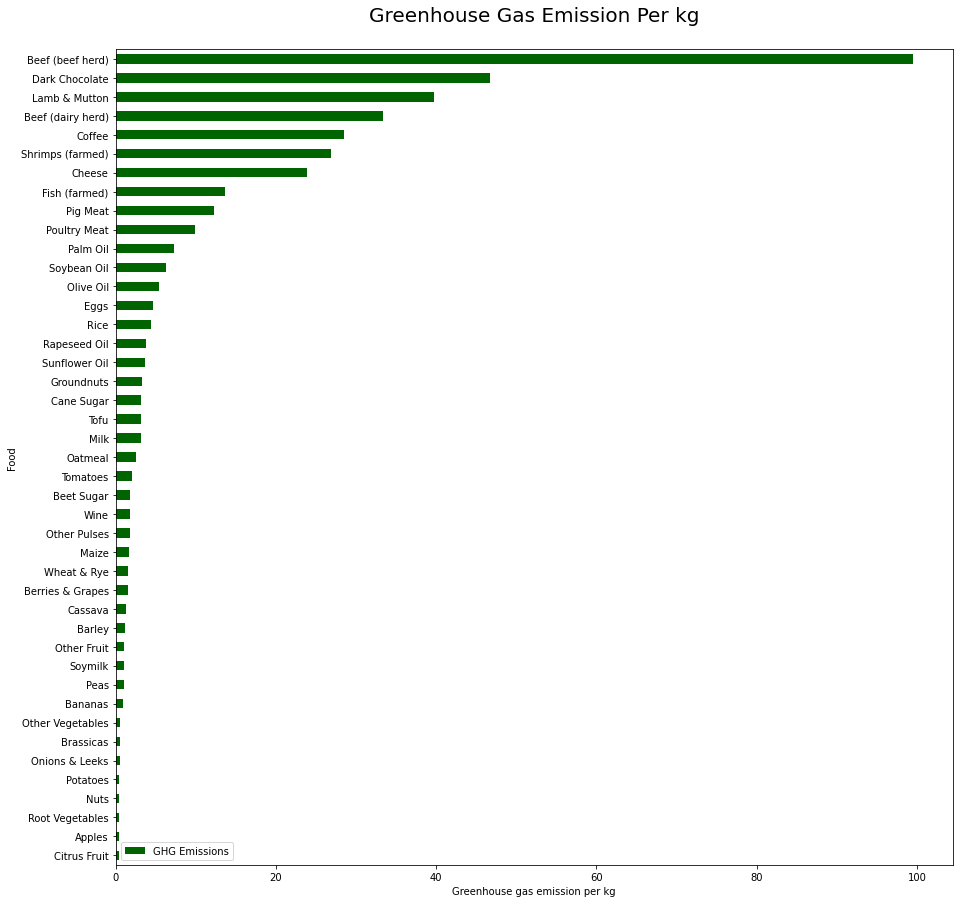

In [ ]:
# 모든 음식 시각화
fig, ax = plt.subplots(figsize=(15, 15))
food.sort_values(by='GHG Emissions', ascending=True).plot(x='Food', y='GHG Emissions', kind='barh', ax=ax, color='darkgreen')
plt.xlabel("Greenhouse gas emission per kg")
plt.title("Greenhouse Gas Emission Per kg\n", size= 20)
plt.show()

In [ ]:
# 고기 빼고 음식 재그룹화

def food_group(x):
  if x in ['Apples', 'Bananas', 'Berries & Grapes', 'Citrus Fruit', 'Other Fruit']:
    return 'Fruits'
  elif x in ['Brassicas', 'Cassava', 'Maize', 'Onions & Leeks', 'Potatoes', 'Tomatoes', 'Root Vegetables', 'Other Vegetables']:
    return 'Vegetables'
  elif x in ['Barley', 'Oatmeal', 'Wheat & Rye', 'Rice']: # -> 쌀 따로 뺄지 고민
    return 'Grains'
  elif x in ['Peas', 'Other Pulses']:
    return 'Pulses'
  elif x in ['Groundnuts', 'Nuts']:
    return 'Nuts'
  elif x in ['Olive Oil', 'Palm Oil', 'Rapeseed Oil', 'Sunflower Oil', 'Soybean Oil']:
    return 'Oil'
  elif x in ['Beet Sugar', 'Cane Sugar']:
    return 'Sugar'
  else:
    return x

food['Food Group'] = food['Food'].apply(food_group)
food['Food Group'].unique()

food_group = food.groupby('Food Group')['GHG Emissions'].mean().sort_values(ascending=False)
food_group

Food Group
Beef (beef herd)     99.4800
Dark Chocolate       46.6500
Lamb & Mutton        39.7200
Beef (dairy herd)    33.3000
Coffee               28.5300
Shrimps (farmed)     26.8700
Cheese               23.8800
Fish (farmed)        13.6300
Pig Meat             12.3100
Poultry Meat          9.8700
Oil                   5.2860
Eggs                  4.6700
Tofu                  3.1600
Milk                  3.1500
Sugar                 2.5050
Grains                2.4200
Nuts                  1.8300
Wine                  1.7900
Pulses                1.3850
Soymilk               0.9800
Vegetables            0.9425
Fruits                0.8520
Name: GHG Emissions, dtype: float64

In [ ]:
# 데이터 삭제
food_group.drop(['Beef (dairy herd)', 'Soymilk', 'Wine'], inplace=True)

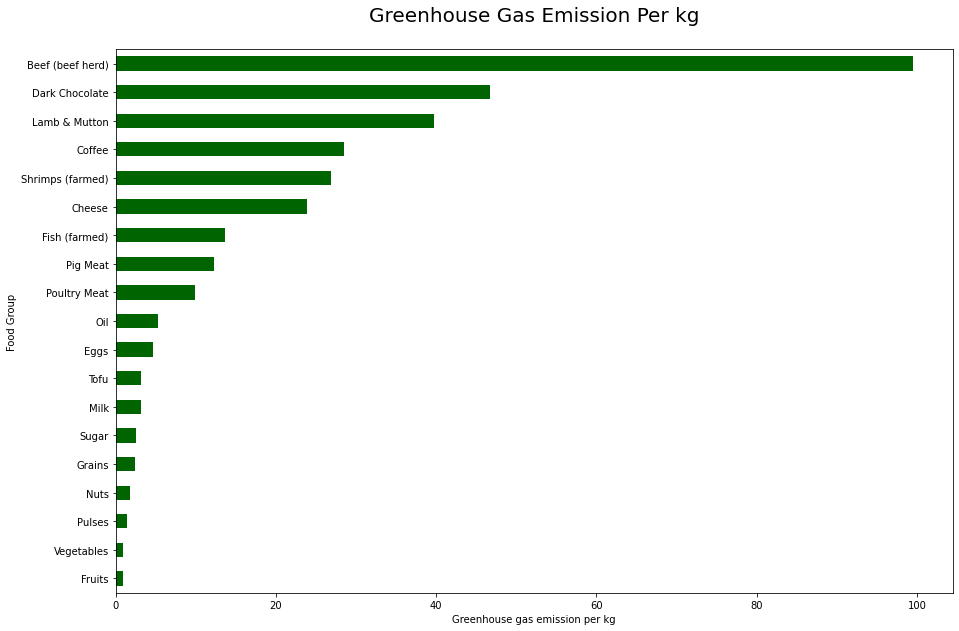

In [ ]:
# 음식 그룹별 온실가스 배출량 시각화
# 값 높을수록 색 진하게 하면 좋을 것 같음!
fig, ax = plt.subplots(figsize=(15, 10))
food_group.sort_values(ascending=True).plot(x='Food Group', y='GHG Emissions', kind='barh', ax=ax, color='darkgreen')
plt.xlabel("Greenhouse gas emission per kg")
plt.title("Greenhouse Gas Emission Per kg\n", size= 20)
plt.show()

In [ ]:
# 주행 온실가스 데이터 추가
food = pd.DataFrame(food_group, columns=['GHG Emissions'])
food.reset_index(inplace=True)
food['km'] = round(food['GHG Emissions'] / (97/1000), 2)
food.head()

,Food Group,GHG Emissions,km
0,Beef (beef herd),99.48,1025.57
1,Dark Chocolate,46.65,480.93
2,Lamb & Mutton,39.72,409.48
3,Coffee,28.53,294.12
4,Shrimps (farmed),26.87,277.01


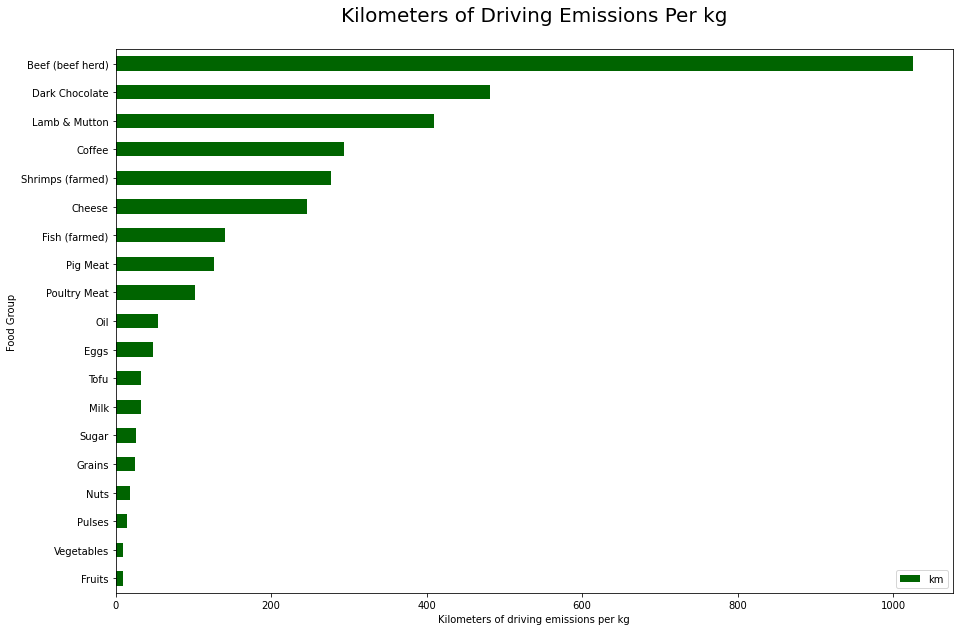

In [ ]:
# 시각화
fig, ax = plt.subplots(figsize=(15, 10))
food.sort_values(by='km', ascending=True).plot(x='Food Group', y='km', kind='barh', ax=ax, color='darkgreen')
plt.xlabel("Kilometers of driving emissions per kg")
plt.title("Kilometers of Driving Emissions Per kg\n", size= 20)
plt.show()

In [ ]:
# 고기 여부 데이터 추가
food['meat'] = food['Food Group'].apply(lambda x: 'Meat' if x in ['Beef (beef herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat'] else 'Not Meat')
food['meat'].unique()

array(['Meat', 'Not Meat'], dtype=object)

In [ ]:
food.head()

,Food Group,GHG Emissions,km,meat
0,Beef (beef herd),99.48,1025.57,Meat
1,Dark Chocolate,46.65,480.93,Not Meat
2,Lamb & Mutton,39.72,409.48,Meat
3,Coffee,28.53,294.12,Not Meat
4,Shrimps (farmed),26.87,277.01,Not Meat


In [ ]:
meat_pct = food.groupby('meat')['GHG Emissions'].sum()
meat_pct

meat
Meat        161.3800
Not Meat    165.7605
Name: GHG Emissions, dtype: float64

In [ ]:
meat_pct = meat_pct.apply(lambda x: x / meat_pct.sum())
meat_pct

meat
Meat        0.493305
Not Meat    0.506695
Name: GHG Emissions, dtype: float64

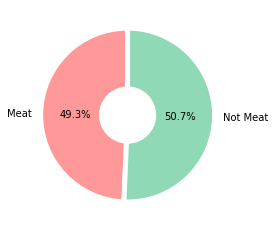

In [ ]:
# 고기 여부에 따른 온실가스 배출량 비율
# 근데 데이터에 모든 음식이 포함된게 아니라서...?
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(meat_pct, labels = food['meat'].unique(), autopct='%.1f%%', startangle=90, colors=['#ff9999', '#8fd9b6'], wedgeprops=wedgeprops)
plt.show()

## 전세계 온실가스 배출량

In [199]:
world = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CO2 emission by countries.csv', encoding='latin1')
world.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²


In [200]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


In [201]:
world = world[['Country', 'Year', 'CO2 emission (Tons)']]
world.isnull().sum()

Country                0
Year                   0
CO2 emission (Tons)    0
dtype: int64

In [ ]:
world['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French G

### 전세계 연도별 데이터



*   1750-2020



In [ ]:
# 연도별 총합 확인
world_year = world.groupby('Year')['CO2 emission (Tons)'].sum()
world_year = pd.DataFrame(world_year, columns=['CO2 emission (Tons)'])
world_year.reset_index(inplace=True)
world_year

,Year,CO2 emission (Tons)
0,1750,9.350528e+06
1,1751,1.870106e+07
2,1752,2.805525e+07
3,1753,3.740944e+07
4,1754,4.676730e+07
...,...,...
266,2016,1.514282e+12
267,2017,1.548201e+12
268,2018,1.584224e+12
269,2019,1.620243e+12


In [238]:
# 톤 단위 백만 기준으로 변경, 반올림
world_year['CO2 emission'] = round(world_year['CO2 emission (Tons)'] * 1e-08, 2)
world_year

,Year,CO2 emission (Tons),CO2 emission
0,1750,9.350528e+06,0.09
1,1751,1.870106e+07,0.19
2,1752,2.805525e+07,0.28
3,1753,3.740944e+07,0.37
4,1754,4.676730e+07,0.47
...,...,...,...
266,2016,1.514282e+12,15142.82
267,2017,1.548201e+12,15482.01
268,2018,1.584224e+12,15842.24
269,2019,1.620243e+12,16202.43


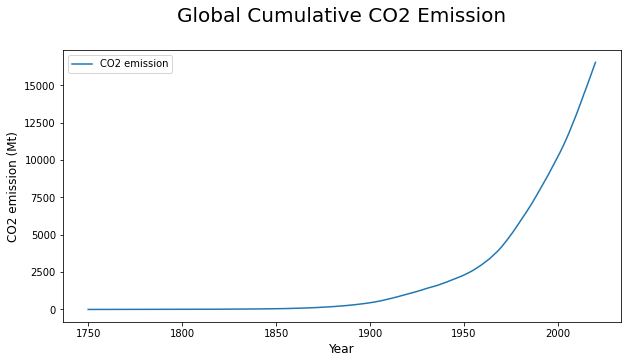

In [170]:
# 전세계 연도별 배출량 (메가톤 = 1,000,000톤)
fig, ax = plt.subplots(figsize=(10, 5))
world_year.plot(x='Year', y='CO2 emission', ax=ax)
plt.xlabel("Year", size=12)
plt.ylabel("CO2 emission (Mt)", size=12)
plt.title("Global Cumulative CO2 Emission\n", size= 20)
plt.show()

* 2010-2020

In [241]:
world_recent = world_year.tail(11)
world_recent

,Year,CO2 emission (Tons),CO2 emission
260,2010,1.309950e+12,13099.50
261,2011,1.343652e+12,13436.52
262,2012,1.377729e+12,13777.29
263,2013,1.411847e+12,14118.47
264,2014,1.447122e+12,14471.22
265,2015,1.479602e+12,14796.02
266,2016,1.514282e+12,15142.82
267,2017,1.548201e+12,15482.01
268,2018,1.584224e+12,15842.24
269,2019,1.620243e+12,16202.43


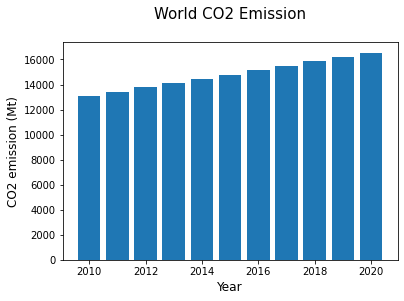

In [242]:
# 전세계 2010-2020 배출량 (bar chart)
plt.bar('Year', 'CO2 emission', data=world_recent)
plt.xlabel("Year", size=12)
plt.ylabel("CO2 emission (Mt)", size=12)
plt.title("World CO2 Emission\n", size= 15)
plt.show()

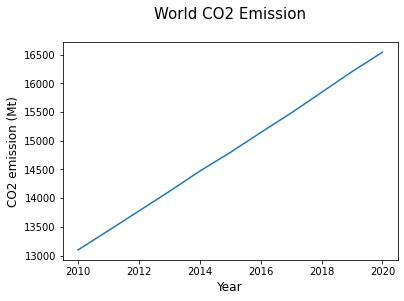

In [243]:
# 전세계 2010-2020 배출량 (line chart)
plt.plot('Year', 'CO2 emission', data=world_recent)
plt.xlabel("Year", size=12)
plt.ylabel("CO2 emission (Mt)", size=12)
plt.title("World CO2 Emission\n", size= 15)
plt.show()

### 한국 연도별 데이터

* 1750-2020

In [202]:
# 한국 - 톤 단위 백만 기준으로 변경, 반올림
korea = world[world['Country']=='South Korea'][['Year', 'CO2 emission (Tons)']].reset_index(drop=True)
korea['CO2 emission'] = round(korea['CO2 emission (Tons)'] * 1e-08, 2)
korea.drop('CO2 emission (Tons)', axis=1, inplace=True)
korea

,Year,CO2 emission
0,1750,0.00
1,1751,0.00
2,1752,0.00
3,1753,0.00
4,1754,0.00
...,...,...
266,2016,157.63
267,2017,164.18
268,2018,170.90
269,2019,177.38


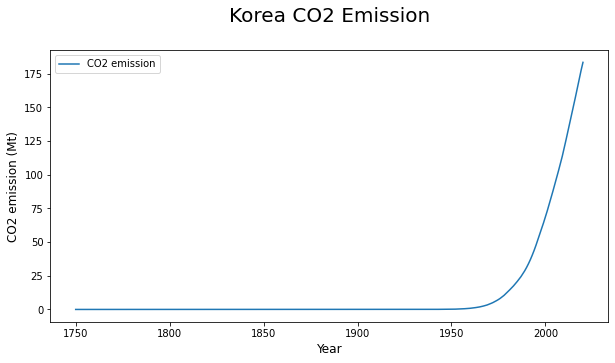

In [217]:
# 한국 연도별 배출량 (메가톤 = 1,000,000톤)
fig, ax = plt.subplots(figsize=(10, 5))
korea.plot(x='Year', y='CO2 emission', ax=ax)
plt.xlabel("Year", size=12)
plt.ylabel("CO2 emission (Mt)", size=12)
plt.title("Korea CO2 Emission\n", size= 20)
plt.show()

* 2010-2018

In [203]:
korea_recent = korea.tail(11)
korea_recent

,Year,CO2 emission
260,2010,119.68
261,2011,125.93
262,2012,132.22
263,2013,138.58
264,2014,144.88
265,2015,151.23
266,2016,157.63
267,2017,164.18
268,2018,170.90
269,2019,177.38


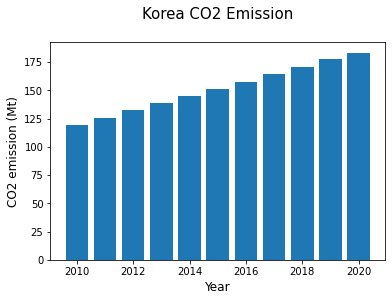

In [213]:
# 한국 2010-2020 배출량
plt.bar('Year', 'CO2 emission', data=korea_recent)
plt.xlabel("Year", size=12)
plt.ylabel("CO2 emission (Mt)", size=12)
plt.title("Korea CO2 Emission\n", size= 15)
plt.show()

### 한국-전세계 연도별 데이터

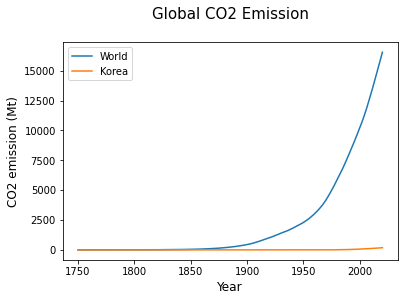

In [215]:
# 한국과 전세계 연도별 배출량 (메가톤 = 1,000,000톤)
# fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(world_year['Year'], world_year['CO2 emission'], korea['Year'], korea['CO2 emission'])
plt.legend(['World', 'Korea'])
plt.xlabel("Year", size=12)
plt.ylabel("CO2 emission (Mt)", size=12)
plt.title("Global CO2 Emission\n", size= 15)
plt.show()

* 2010-2020

In [239]:
# 전세계 평균
world_recent['CO2 emission average'] = world_recent['CO2 emission'].apply(lambda x: round(x/world['Country'].nunique(), 2))
world_recent

,Year,CO2 emission (Tons),CO2 emission,CO2 emission average
260,2010,1.309950e+12,13099.50,59.54
261,2011,1.343652e+12,13436.52,61.08
262,2012,1.377729e+12,13777.29,62.62
263,2013,1.411847e+12,14118.47,64.17
264,2014,1.447122e+12,14471.22,65.78
265,2015,1.479602e+12,14796.02,67.25
266,2016,1.514282e+12,15142.82,68.83
267,2017,1.548201e+12,15482.01,70.37
268,2018,1.584224e+12,15842.24,72.01
269,2019,1.620243e+12,16202.43,73.65


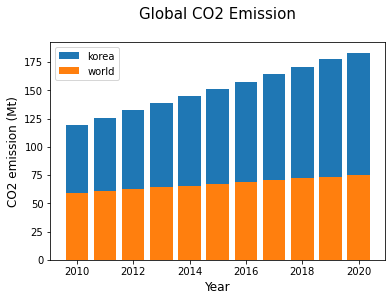

In [240]:
# 2010-2020 세계 평균 vs 한국
plt.bar('Year', 'CO2 emission', data=korea_recent, label='korea')
plt.bar('Year', 'CO2 emission average', data=world_recent, label='world')
plt.legend()
plt.xlabel("Year", size=12)
plt.ylabel("CO2 emission (Mt)", size=12)
plt.title('Global CO2 Emission\n', size= 15)
plt.show()

## 가축업 온실가스 배출량

### 온실가스 배출량 중 가축업 비중

In [278]:
# 2010년 자료입니다!
livestock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GLEAM_LivestockEmissions.csv')
livestock.head()

,Region,Animal species,Production system,Commodity,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e),...,"Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","LUC: soy & palm, CO2 (kg CO2e)","LUC: pasture expansion, CO2 (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"
0,Global,Cattle,Aggregated,Aggregated,160.3,2.916310e+10,4.674630e+12,9.449299e+11,2.648727e+12,1.080973e+12,...,1.740732e+11,7.419864e+11,4.687954e+10,3.870062e+11,2.509275e+12,1.394522e+11,1.649130e+11,4.215542e+10,1.585653e+10,9.955932e+10
1,Global,Cattle,Aggregated,Milk,86.7,1.888089e+10,1.637519e+12,2.756914e+11,9.676442e+11,3.941834e+11,...,7.166208e+10,2.543885e+11,1.497421e+10,NaN,8.856352e+11,8.200906e+10,6.813278e+10,2.993485e+10,3.252889e+09,8.929544e+10
2,Global,Cattle,Aggregated,Meat,295.4,1.028222e+10,3.037111e+12,6.692385e+11,1.681083e+12,6.867892e+11,...,1.024111e+11,4.875979e+11,3.190534e+10,3.870062e+11,1.623640e+12,5.744310e+10,9.678019e+10,1.222057e+10,1.260364e+10,1.026388e+10
3,Global,Cattle,Grassland systems,Aggregated,206.3,1.033817e+10,2.133054e+12,5.628062e+11,1.052965e+12,5.172829e+11,...,5.253660e+10,4.267612e+11,8.194330e+09,3.870062e+11,9.969096e+11,5.605552e+10,3.798508e+10,1.417326e+10,4.303272e+09,3.773092e+10
4,Global,Cattle,Grassland systems,Milk,95.0,6.940654e+09,6.592844e+11,9.286140e+10,3.713461e+11,1.950770e+11,...,2.156126e+10,1.587838e+11,2.412100e+09,NaN,3.369018e+11,3.444428e+10,1.473188e+10,1.078605e+10,9.998435e+08,3.462338e+10


In [245]:
livestock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 22 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Region                                           583 non-null    object 
 1   Animal species                                   583 non-null    object 
 2   Production system                                583 non-null    object 
 3   Commodity                                        583 non-null    object 
 4   Emission Intensity (kg CO2e per kg protein)      583 non-null    float64
 5   Production (kg protein)                          543 non-null    float64
 6   Total GHG emissions (kg CO2e)                    543 non-null    float64
 7   Total CO2 emissions (kg CO2e)                    543 non-null    float64
 8   Total CH4 emissions (kg CO2e)                    543 non-null    float64
 9   Total N2O emissions (kg CO2e)   

In [269]:
livestock_total = livestock[livestock['Region']=='Global']['Total GHG emissions (kg CO2e)'].sum()
world_total = world_year[world_year['Year']==2010]['CO2 emission (Tons)']
print(livestock_total/world_total)

260    21.716418
Name: CO2 emission (Tons), dtype: float64



유엔식량농업기구(FAO)
*   **축산업**에서 배출되는 온실가스는 전체 발생량의 약 16.5%에 달한다.
*   **축산업**에서 배출되는 온실가스는 **총식량시스템**의 1/3을 차지하고 있다
*   전 세계 온실가스 배출량의 4분의 1이 **식품**에서 발생했다
*   축산업에서 육류제품과 관련된 부분의 비중은 61%가 넘는다.


### 가축업 종류별 온실가스 배출량

In [281]:
livestock = livestock[['Region', 'Animal species', 'Commodity', 'Total GHG emissions (kg CO2e)', 'Total CO2 emissions (kg CO2e)', 'Total CH4 emissions (kg CO2e)', 'Total N2O emissions (kg CO2e)']]
livestock.head()

,Region,Animal species,Commodity,Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e)
0,Global,Cattle,Aggregated,4.674630e+12,9.449299e+11,2.648727e+12,1.080973e+12
1,Global,Cattle,Milk,1.637519e+12,2.756914e+11,9.676442e+11,3.941834e+11
2,Global,Cattle,Meat,3.037111e+12,6.692385e+11,1.681083e+12,6.867892e+11
3,Global,Cattle,Aggregated,2.133054e+12,5.628062e+11,1.052965e+12,5.172829e+11
4,Global,Cattle,Milk,6.592844e+11,9.286140e+10,3.713461e+11,1.950770e+11


In [252]:
livestock['Region'].value_counts()

Global                             53
East Asia and Southeast Asia       53
Eastern Europe                     53
Latin America and the Caribbean    53
Near East and North Africa         53
North America                      53
Oceania                            53
Russian Federation                 53
South Asia                         53
Sub-Saharan Africa                 53
Western Europe                     53
Name: Region, dtype: int64

In [246]:
livestock['Animal species'].value_counts()

Cattle       121
Chicken      121
Buffaloes     99
Sheep         99
Goats         99
Pigs          44
Name: Animal species, dtype: int64

In [247]:
livestock['Commodity'].unique()
# aggregated, milk, eggs는 제외..?

array(['Aggregated', 'Milk', 'Meat', 'Eggs'], dtype=object)

In [316]:
# 범위는 전세계, 동물 종류별로 그룹화
meat = livestock[livestock['Region']=='Global']
meat.drop('Region', axis=1, inplace=True)

# 고기만 선택
meat = meat[meat['Commodity']=='Meat']
meat.drop('Commodity', axis=1, inplace=True)
meat = meat.groupby('Animal species').sum()
meat

,Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e)
Animal species,,,,
Buffaloes,4.836913e+11,5.399012e+10,3.209370e+11,1.087642e+11
Cattle,6.074222e+12,1.338477e+12,3.362166e+12,1.373578e+12
Chicken,1.012583e+12,7.348422e+11,1.624566e+10,2.614949e+11
Goats,2.998545e+11,3.643984e+10,2.005732e+11,6.284151e+10
Pigs,1.638629e+12,7.477151e+11,5.086355e+11,3.822788e+11
Sheep,4.311667e+11,4.516168e+10,2.587220e+11,1.272830e+11


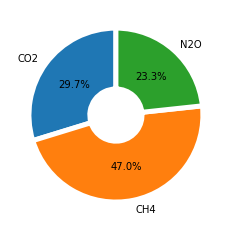

In [289]:
# 전체 온실가스 배출량에서 종류별 비중
meat_total = [meat['Total CO2 emissions (kg CO2e)'].sum(), meat['Total CH4 emissions (kg CO2e)'].sum(), meat['Total N2O emissions (kg CO2e)'].sum()]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(meat_total, labels = ['CO2', 'CH4', 'N2O'], autopct='%.1f%%', startangle=90, wedgeprops=wedgeprops)
plt.show()

In [317]:
# 메탄(CH4), 이산화질소(N2O), 이산화탄소(CO2) Mt 단위로 변경
meat = meat[['Total CH4 emissions (kg CO2e)', 'Total CO2 emissions (kg CO2e)', 'Total N2O emissions (kg CO2e)']].apply(lambda x: round(x*1e-8, 2))
meat

,Total CH4 emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total N2O emissions (kg CO2e)
Animal species,,,
Buffaloes,3209.37,539.90,1087.64
Cattle,33621.66,13384.77,13735.78
Chicken,162.46,7348.42,2614.95
Goats,2005.73,364.40,628.42
Pigs,5086.35,7477.15,3822.79
Sheep,2587.22,451.62,1272.83


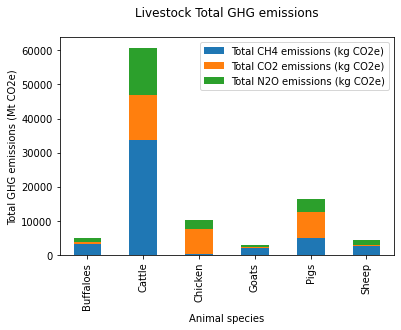

In [321]:
# 축산업 온실가스 배출량
meat.plot.bar(stacked=True)
plt.ylabel("Total GHG emissions (Mt CO2e)")
plt.title('Livestock Total GHG emissions\n', size= 12)
plt.show()